# MBA em Ciência de Dados
# Técnicas Avançadas de Captura e Tratamento de Dados

### <span style="color:darkred">Módulo I</span>


### <span style="color:darkred">Exercícios</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

---

In [1]:
# carregando a biblioteca necessária
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Exercício 1)

Considere a tabela com os dados a seguir

 username     | Primeiro Nome  | Sobrenome | Ano de nascimento | Foto
 :------ |:--------- |:----- | --- | --- 
 joao@provider.com     | João | Oliveira | 1996 | foto1033.jpg
 bet89@hoster.net    | Elizabete | Costa Silva | 1989 | foto0010.jpg
 maria@internet.com.br | Maria Cláudia | Nunes de Souza | 1976 | foto2401.jpg
 
 De acordo com a definição de dados estruturados e não estruturados, esse conjunto de dados é
 
 X(a) Estruturado<br>
 (b) Não-estruturado<br>
 (c) Estruturado quando não consideramos o atributo *Foto*<br>
 (d) Estruturado quando não consideramos os atributos *username* e *Foto*<br>
 
 Justifique sua escolha.

---

### Exercício 2)

São características de dados não-estruturados

 (a) Facilidade de versionamento, baixo controle de coleta, e inexistência de formato bem definido para armazenamento<br>
 X(b) Alta dimensionalidade, armazenamento em formato binário ou textual, e alta flexibilidade na coleta dos dados<br>
 (c) Alta redundância, e informações fáceis de recuperar a partir dos dados brutos<br>
 (d) Inexistência de esquema de armazenamento e recuperação, e alto controle de integridade dos dados<br>



---

### Exercício 3)

Considere as informações dadas a seguir:

<img src="./imagens/foto_tabela2.jpg" alt="tabela" width="760"/>

Poderíamos dizer que os dados disponíveis nesse arquivo exibido são do tipo: 

(a) não estruturado<br>
(b) estruturado

Justifique sua resposta.


---

Para os próximos exercícios, vamos analise a base de dados dada pelo arquivo abaixo, que contém 100 linhas. Em particular vamos estudar os atributos "Religion", "Profession" e "Year of Birth", que possuem dados faltantes. Esses dados foram coletados de pessoas nascidas entre 1960 e 1998. Explore os atributos e dados utilizando estatística descritiva com `.describe()`, buscando pelo conjunto de valores únicos com `.unique()`, realizando contagem de frequência com `.value_counts()` (Atenção: o método `value_counts()` não mostra valores nulos/`nan`), agrupando valores com `.groupby()`.  Para além dessas sugestões, você pode explorar a base de dados com outras ferramentas, gráficos e buscas para responder.

In [3]:
data_m = pd.read_csv("./dados/TACTD-01-Exercicios-Missing.csv")

### Exercício 4)

Explore o atributo Profession e escolha a opção que melhor descreve os dados incorretos e/ou faltantes:

(a) há 2 dados faltantes<br>
(b) há 8 dados faltantes, sendo 8 desses dados incorretos<br>
(c) há 6 dados faltantes, sendo 2 desses dados incorretos<br>
(d) há 8 dados faltantes, sendo 6 desses dados incorretos<br>


In [15]:
# insira seu código exibindo a estatística descritiva e valores únicos para o atributo Profession
data_prof = data_m[data_m["Profession"].isna()]
display(data_prof)

data_m.groupby("Profession").describe()


,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession
60,Brad Ferguson,M,1996.0,USA,Christian,New Orleans,NaN
80,Maique Santos,M,1989.0,Brazil,Christian,São Paulo,NaN


Year of Birth                                                \
                   count         mean      std     min     25%     50%   
Profession                                                               
Nurse               79.0  1979.620253  10.5979  1960.0  1973.5  1980.0   
X                    5.0  1982.000000  12.5499  1970.0  1970.0  1980.0   

                            
               75%     max  
Profession                  
Nurse       1987.0  1999.0  
X           1995.0  1995.0

### Exercício 5)

Sobre o atributo Religion, busque por dados incorretos, corrigindo os que forem possível corrigir, e tornando nulos (`null`/`nan`) os que não forem passíveis de correção. Ao final temos, para essa variável em particular:

(a) 1 dado incorreto corrigido, e 4 dados faltantes<br>
X(b) 1 dado incorreto corrigido, e 5 dados faltantes<br>
(c) nenhum dado incorreto corrigido, e 6 dados faltantes<br>
(d) nenhum dado incorreto corrigido, e 5 dados faltantes<br>


In [25]:
# insira seu código explorando o atributo Religion
data_rel = data_m[data_m["Religion"].isna()]
display(data_rel)

display(data_m.groupby("Religion").describe())

data_m.loc[data_m["Religion"] == 'Cjristian', "Religion"] = 'Christian'
data_m.loc[data_m["Religion"] == '---', "Religion"] = np.nan
data_m.loc[data_m["Religion"] == 'x', "Religion"] = np.nan

data_rel = data_m[data_m["Religion"].isna()]
display(data_rel)

display(data_m.groupby("Religion").describe())

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession
31,Billie Duncan,F,1976.0,Scotland,NaN,Edinburgh,Nurse
64,Willene Wolfgram,F,1987.0,USA,NaN,New Orleans,Nurse
98,John Bradley,M,1984.0,Canada,NaN,Vancouver,Nurse


Year of Birth                                                       \
                  count     mean        std     min     25%     50%      75%   
Religion                                                                       
---                 1.0  1983.00        NaN  1983.0  1983.0  1983.0  1983.00   
Christian          80.0  1979.75  10.891293  1960.0  1973.0  1980.0  1987.25   
Cjristian           1.0  1997.00        NaN  1997.0  1997.0  1997.0  1997.00   
x                   1.0  1978.00        NaN  1978.0  1978.0  1978.0  1978.00   

                   
              max  
Religion           
---        1983.0  
Christian  1999.0  
Cjristian  1997.0  
x          1978.0

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession
3,Wendell Freeman,M,1978.0,Mexico,NaN,Acapulco,Nurse
31,Billie Duncan,F,1976.0,Scotland,NaN,Edinburgh,Nurse
64,Willene Wolfgram,F,1987.0,USA,NaN,New Orleans,Nurse
73,Carlos Cobre,M,1983.0,Brazil,NaN,São Paulo,Nurse
98,John Bradley,M,1984.0,Canada,NaN,Vancouver,Nurse


Year of Birth                                                  \
                  count         mean        std     min     25%     50%   
Religion                                                                  
Christian          81.0  1979.962963  10.991411  1960.0  1973.0  1980.0   

                           
              75%     max  
Religion                   
Christian  1988.0  1999.0

### Exercício 6)

Você recebeu informação do especialista que participou da coleta, que os dados contém profissionais nascidos entre 1960 e 2000. Sobre o atributo Year of Birth, realize uma análise exploratória, buscando por dados incorretos e faltantes. Corrija os que for possível corrigir. Após o tratamento, responda qual(is) tipo(s) de dados faltantes são mais plausíveis com base nos dados.

(a) não há dados faltantes após a correção<br>
(b) faltantes completamente aleatórios (MCAR) <br>
(c) faltantes (condicionalmente) aleatórios (MAR)<br>
(d) não aleatório (MNAR)<br>

Dica: como o atributo é numérico, pode ser útil utilizar histograma (`df['var'].hist()`) para visualizar a distribuição dos anos de nascimento.

,Name,Sex,Year of Birth,Country of Birth,Religion,City,Profession
9,Stuart Mathis,M,NaN,Peru,Christian,Arequipa,Nurse
14,Leanne Lowy,F,NaN,England,Christian,Birmingham,Nurse
18,Apolonia Abler,F,NaN,Australia,Christian,Brisbane,Nurse
26,Michele Fletcher,F,NaN,Scotland,Christian,Edinburgh,Nurse
27,Hubert Chapman,M,NaN,Scotland,Christian,Edinburgh,Nurse
37,Ariel Almada,F,NaN,Portugal,Christian,Lisbon,X
47,Douglas Damario,M,NaN,USA,Christian,New Orleans,Nurse
48,Eugenio Ewell,M,NaN,USA,Christian,New Orleans,Nurse
83,Valeri Vanegas,F,NaN,Spain,Christian,Valencia,Nurse
84,Bennie Reeves,F,NaN,Spain,Christian,Valencia,Nurse


14

array([1964., 1976., 1978., 1990., 1992., 1999., 1960., 1963.,   nan,
       1977., 1983., 1979., 1986., 1987., 1974., 1984., 1997., 1996.,
       1961., 1972., 1975., 1993., 1970., 1980., 1995., 1962., 1973.,
       1981., 1982., 1985., 1998., 1991., 1988., 1989., 1971., 1994.])

36

<AxesSubplot:>

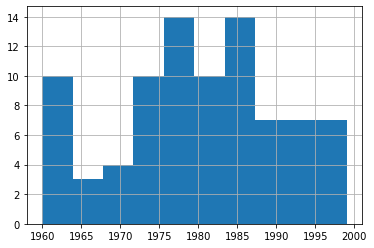

In [33]:
# insira seu código explorando o atributo Year of Birth
display(data_m[data_m["Year of Birth"].isna()])

display(data_m[data_m["Year of Birth"].isna()].shape[0])

display(data_m["Year of Birth"].unique())

display(data_m["Year of Birth"].unique().shape[0])

data_m["Year of Birth"].hist()

---
Para os próximos exercícios vamos usar outra base de dados conforme carregada abaixo. Para os próximos exercícios, o uso de `boxplot()` e `hist()` pode ser útil, 

In [ ]:
data2 = pd.read_csv("./dados/TACTD-01-Redundant-Outlier.csv") 

### Exercício 7)

Sabendo que o salário médio da base dos profissionais da área de saúde (Enfermeiros) é 50 mil, explore essa variável. De acordo com a análise do intervalo interquartil utilizada visualmente pelo gráfico de caixa, quantos valores podem ser considerados outliers?

(a) 6<br>
(b) 4<br>
(c) 3<br>
(d) 2<br>


### Exercício 8)

Analise os outliers obtidos na questão anterior, em particular os outliers que estão ACIMA (com valores maiores) do que a maior parte dos salários. Analise esses dados com relação aos atributos: Sex e City. Com base nessa análise, podemos dizer que esses outliers são

(a) Globais ou pontuais<br>
(b) Contextuais com base no atributo Sex<br>
(c) Contextuais com base no atributo City<br>
(d) Coletivos com base no atributo Sex<br>

Dica: agrupe (`groupby`) estatísticas de salário com base nos atributos Sex e City.


---
## Exercício 9) 

Analise os atributos categóricos 'Sex' e 'Country of Birth' da base de dados. Assuma que queremos fazer uma análise cuja variável alvo será um desses atributos. Nesse caso podemos dizer que:

(a) Country of Birth é desbalanceado<br>
(b) Sex é desbalanceado<br>
(c) Country of Birth e Sex são desbalanceados<br>
(d) Nenhum dos atributos é desbalanceado<br>

---
## Exercício 10) 

Verifique se há redundância em termos de: (i) linhas duplicadas, e (ii) atributos constantes e redundantes. Qual o resultado dessa análise?

(a) 4 linhas duplicadas; atributo constante: Profession; atributo redundante: Age<br>
(b) 4 linhas duplicadas; atributo constante: Age; atributo redundante: Sex<br>
(c) 3 linhas duplicadas; atributo constante: Profession; atributo redundante: City<br>
(d) 3 linhas duplicadas; atributo constante: Name; atributo redundante: Year of Birth<br>